In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#currently only 900 rows each. we can probably search for more niche terms similar to the 3 roles and add these roles inside the data files

data_eng = pd.read_csv('../src/output/data-engineer_28-03-2023.csv',encoding= 'unicode_escape')
data_sci = pd.read_csv('../src/output/data-science_27-03-2023.csv',encoding= 'unicode_escape')
data_an = pd.read_csv('../src/output/data-analyst_28-03-2023.csv',encoding= 'unicode_escape')
data_an.head()

,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...


In [59]:
data_eng['y_role'] = 'data_engineer'
data_sci['y_role'] = 'data_science'
data_an['y_role'] = 'data_analyst'

data_an.head()


,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,y_role
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst


In [60]:
#Average company salary based on the range,and fill NA with average of each job type

def fn(x):
    if x == 0 :
        return 0
    else:
        s = x.split(' - ')
        s = sum(map(int,s))/len(s)
        return s

data_eng['company_salary'] = data_eng['company_salary'] .replace(np.nan,0)
data_sci['company_salary'] = data_sci['company_salary'] .replace(np.nan,0)
data_an['company_salary'] = data_an['company_salary'] .replace(np.nan,0)
data_eng['company_salary'] = data_eng['company_salary'].apply(fn)
data_sci['company_salary'] = data_sci['company_salary'].apply(fn)
data_an['company_salary'] = data_an['company_salary'].apply(fn)

#get average based on job type
#data_eng_avg = data_eng['company_salary'].mean()
#data_sci_avg = data_sci['company_salary'].mean()
#data_an_avg = data_an['company_salary'].mean()
#data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
#data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
#data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw1 = data_eng.append(data_sci).append(data_an)


<ipython-input-60-733b8db6f9fd>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_raw1 = data_eng.append(data_sci).append(data_an)


In [61]:
data_raw1

,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,y_role
0,Incube8 Pte Ltd,3.9,Data Engineer (Data Science),Novena,7500.0,"Maintain, build and iteratively improve existi...",https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
1,TRINITY CONSULTING SERVICES PTE. LTD.,4.1,Data Engineer,Singapore,7000.0,"Bachelors degree/Diploma in Computer Science,...",https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
2,ELLIOTT MOSS CONSULTING PTE. LTD.,3.0,Data Engineer,Singapore,8000.0,The candidate for the Senior Data Engineer rol...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
3,DYNAMIC HUMAN CAPITAL PTE. LTD.,3.9,Data Engineer,Singapore,6000.0,Cooperates with DevOps and Business Intelligen...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
4,SAKSOFT PTE LIMITED,3.7,Data Engineer,Singapore,9000.0,Minimum 8 years of extensive experience in dea...,https://www.glassdoor.sg/partner/jobListing.ht...,data_engineer
...,...,...,...,...,...,...,...,...
895,NCS,3.8,Data & Analytics Consultant (Nucleus Graduate ...,Singapore,73000.0,Translate customer pain-points into problem st...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
896,TRUST RECRUIT PTE. LTD.,5.0,"URGENT!!! Data Analyst (Game Industry, Python,...",Singapore,5500.0,"Leading 2D & 3D games, mobile & web games indu...",https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
897,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5500.0,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
898,SUCCESS HUMAN RESOURCE CENTRE PTE. LTD.,4.3,"Data Analyst, Institutional Statistics (Educat...",Singapore,3000.0,Collate and compile data from various sources/...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst


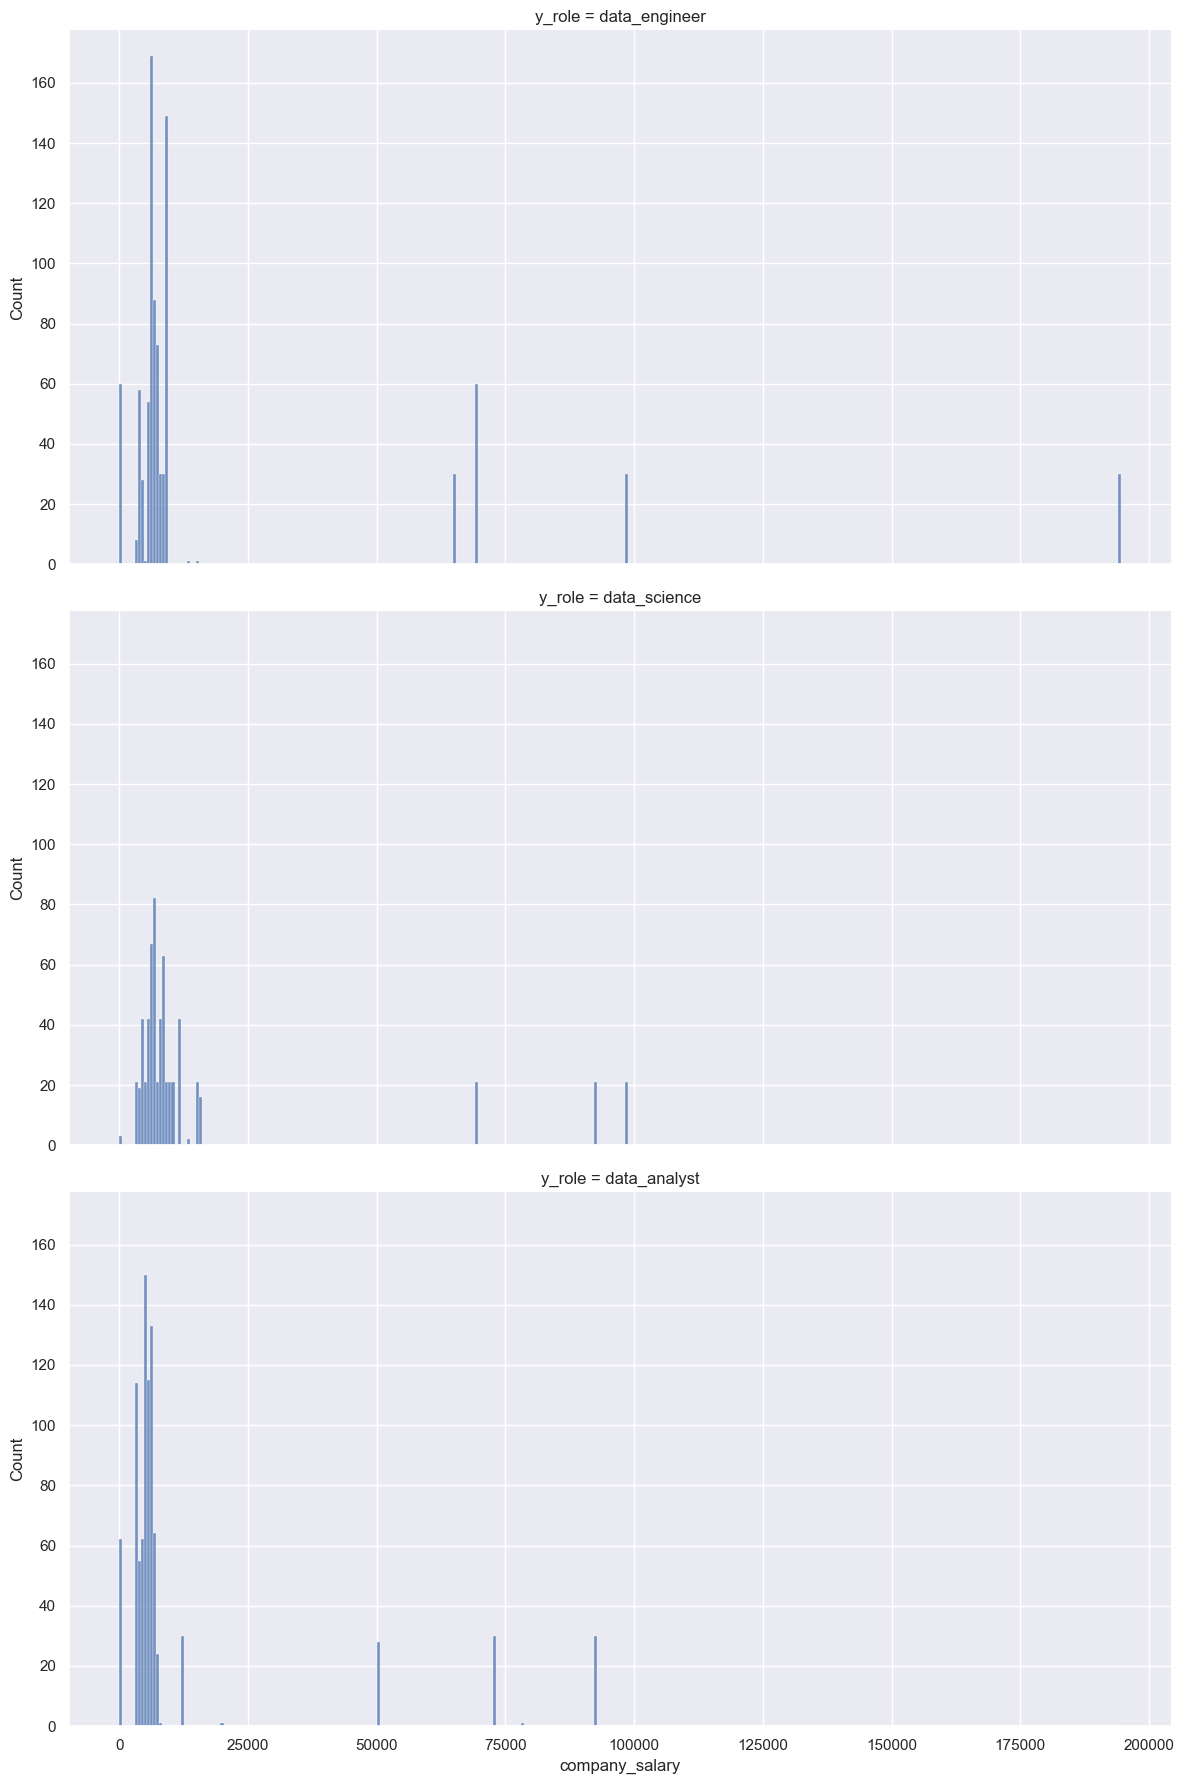

In [68]:
sns.set(rc={'figure.figsize':(15,25)})
sns.displot(data = data_raw1,x = 'company_salary',row = 'y_role',height = 6,aspect=2)
plt.show()

In [72]:
#get average based on job type
data_eng_avg = data_eng['company_salary'].mean()
data_sci_avg = data_sci['company_salary'].mean()
data_an_avg = data_an['company_salary'].mean()
data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw = data_eng.append(data_sci).append(data_an)

<ipython-input-72-ff11cabf8457>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_raw = data_eng.append(data_sci).append(data_an)


C:\Users\JeeJoo\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


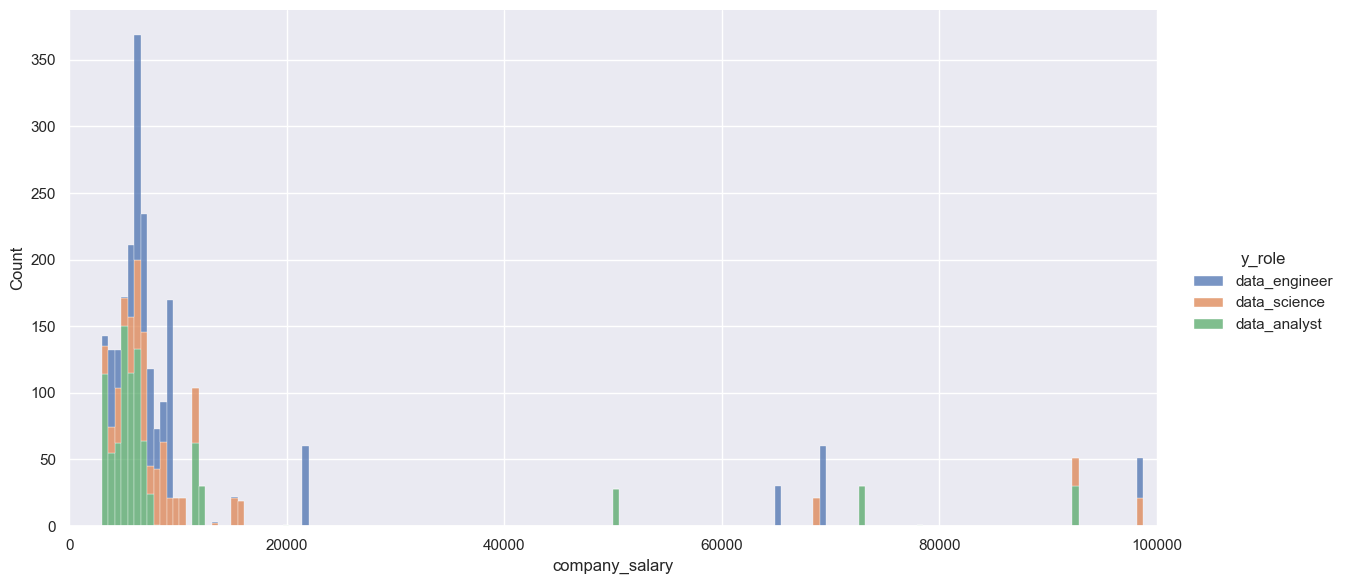

In [74]:
#plot with new data replacing 0 with average of job that we have
sns.displot(data = data_raw,x = 'company_salary',hue = 'y_role',height = 6,aspect=2,multiple='stack')
plt.xlim(0,100000)
plt.show()